# **PERKENALAN**


1.   Nama : Rifqi Julian Hasyari
2.   Batch : HCK 006



> Latar Belakang
Alasan di balik membangun model prediktif menggunakan data kanker paru-paru adalah untuk mendukung deteksi dini, diagnosis, dan pengobatan efektif pasien kanker paru-paru. Kanker paru-paru adalah salah satu penyakit paling mematikan di dunia dan deteksi dini sangat penting untuk meningkatkan penyembuhan dan memperpanjang hidup penderitanya.



> OBJECTIVE:

*   Ingin mencari tahu apa saja faktor-faktor penyebab dari level kanker paru2 ini.
*   Membuat model prediksi untuk mendeteksi level pasien kanker paru-paru berdasarkan fitur2 yang dipilih nantinya.







# **IMPORT LIBRARIES**

In [1]:
!pip install phik
!pip install feature_engine

In [2]:
import pandas as pd
import phik
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings(action='ignore')

# **Data Loading/ Data cleaning**

In [3]:
Data=pd.read_csv('cancer patient data sets.csv')
Data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Berdasarkan output diatas dapat dilihat bahwa dataframe yang kita akan gunakan memiliki 1000 baris dan 26 kolom yang nantinya akan kita preprocessing.

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

Output diatas menunjukan seluruh kolom serta jenis tipe data dari tiap kolom tersebut.

In [5]:
Data = Data.drop('index', axis=1)

Disini saya melakukan drop kolom index karena tidak akan saya pakai.

In [6]:
Data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


output diatas menunjukan data statistik dari setiap kolom yang kita miliki sebagai contoh saya mengambil data statistik di kolom Age. Pada kolom tersebut dapat diliha terdapat total input data sebesar 1000.000000, nilai rata2 umur sebesar 37.174000 , nilai standar deviasi sebesar 12.005493, nilai minimal age adalah 14, hingga nilai max sebesar 73 yang terdapat pada kolom Age. Begitu pun dengan kolom2 lain.

In [7]:
Data.isna().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Berdasarkan output diatas dapat dilihat bahwa tidak terdapat missing value yang ada pada dataset kita sehingga kita tidak perlu handling missing value.

In [8]:
selected_columns = ['Age', 'Snoring', 'Dry Cough','Frequent Cold']
num_cols = Data[selected_columns]

Disini saya mengambil kolom age,snoring,dry cough, frequent cold yang merupakan data numerikal.

In [9]:
# numeric overview
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Snoring,1000.0,2.926,1.474686,1.0,2.00,3.0,4.0,7.0
Dry Cough,1000.0,3.853,2.039007,1.0,2.00,4.0,6.0,7.0
Frequent Cold,1000.0,3.536,1.832502,1.0,2.00,3.0,5.0,7.0


Pada output diatas menunjukan informasi yang sama seperti describe sebelumnya namun ini hanya untuk kolom yang numerikal.

In [10]:
Data.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [11]:
selected_columns = ['Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails']
Cat_cols = Data[selected_columns]

Disini saya mengambil kolom yang bersifat kategorikal untuk saya liat kardinalitasnya.

In [12]:
# categorical overview
for i in Cat_cols:
    print('Column: ',i)
    print('Total unique labels: ', Data[i].nunique())
    print('-' * 30)

Column:  Air Pollution
Total unique labels:  8
------------------------------
Column:  Alcohol use
Total unique labels:  8
------------------------------
Column:  Dust Allergy
Total unique labels:  8
------------------------------
Column:  OccuPational Hazards
Total unique labels:  8
------------------------------
Column:  Genetic Risk
Total unique labels:  7
------------------------------
Column:  chronic Lung Disease
Total unique labels:  7
------------------------------
Column:  Balanced Diet
Total unique labels:  7
------------------------------
Column:  Obesity
Total unique labels:  7
------------------------------
Column:  Smoking
Total unique labels:  8
------------------------------
Column:  Passive Smoker
Total unique labels:  8
------------------------------
Column:  Chest Pain
Total unique labels:  9
------------------------------
Column:  Coughing of Blood
Total unique labels:  9
------------------------------
Column:  Fatigue
Total unique labels:  8
-----------------------

Kolom diatas dilakukan untuk mengecek apakah terdapat kolom yang memiliki high cardinality. Berdasarkan data diatas bahwa tidak terdapat kolom yang memiliki high cardnilaity sehingga kita tidak perlu melakukan handling cardinality.

# **Exploratory Data Analysis (EDA)**

interval columns not set, guessing: ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']


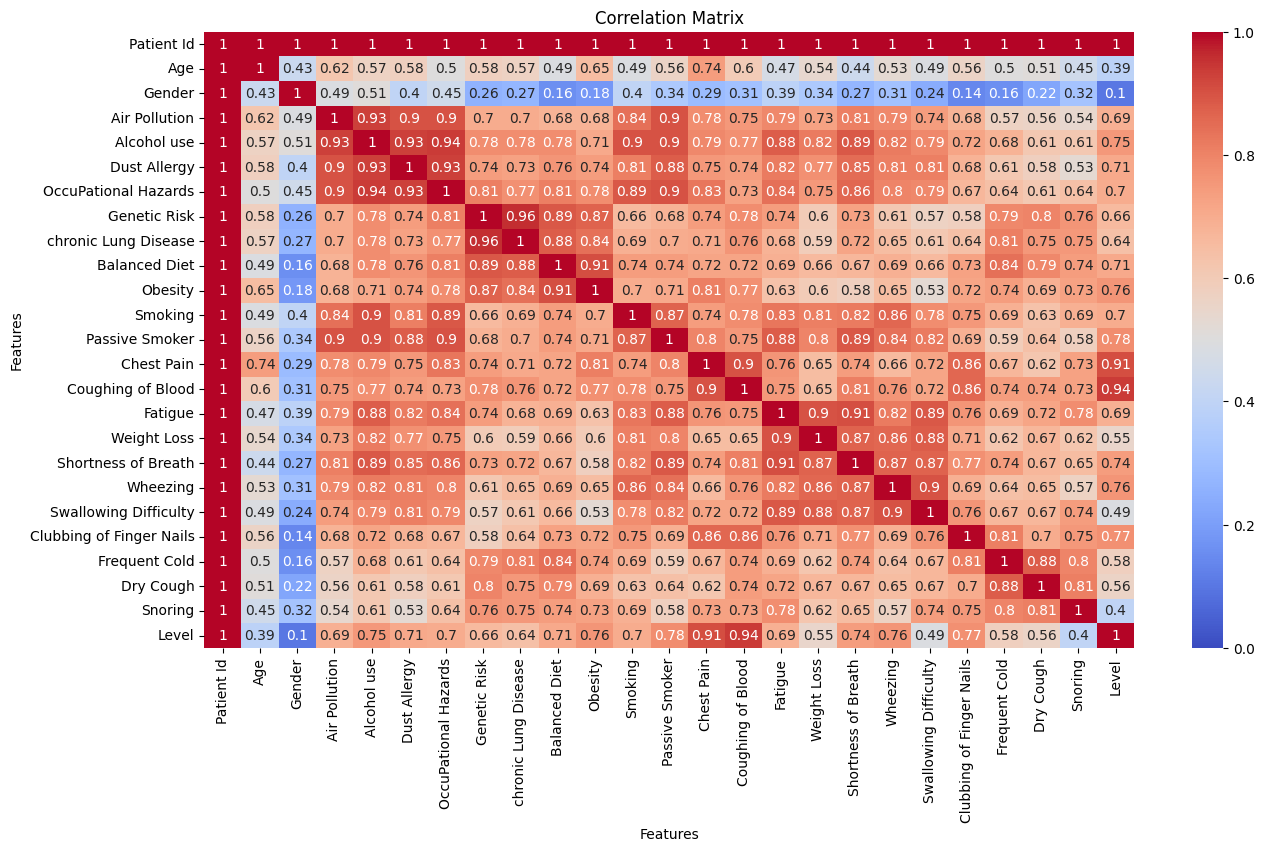

In [13]:
# Assuming you already have the 'phik_overview' correlation matrix
phik_overview = Data.phik_matrix()

# Round the correlation values to two decimal places
phik_overview_rounded = phik_overview.round(2)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(phik_overview_rounded, annot=True, cmap='coolwarm', vmin=0, vmax=1, xticklabels=phik_overview.columns, yticklabels=phik_overview.index)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Kolom diatas merupakan phik corelation yang dibuat untuk melihat korelasi atau hubungan dari tiap data yang ada. Disini saya ingin melihat korelasi antara fitur terhadap target yaitu level. Berdasarkan phik corelation tersebut dapat dilihat sebagai berikut:

1.   Age terhadap Level = 0.39
2.   Gender terhadap Level = 0.1
3.   Air Pollution terhadap Level = 0.69
4.   Alcohol Use terhadap level = 0.75
5.   dan seterusnya



> Pada model ini saya menggunakan tresshold sebesar 0.4 yang artinya saya akan menggunakan fitur yang memiliki korelasi diatas atau sama dengan 0.4 dan melakukan drop kolom terhadap kolom yang memiliki korelasi dibawah 0.4





In [14]:
Data['Age'].unique()

array([33, 17, 35, 37, 46, 52, 28, 44, 64, 39, 34, 27, 73, 36, 14, 24, 53,
       62, 29, 65, 38, 19, 42, 32, 25, 45, 26, 48, 22, 18, 23, 47, 61, 55,
       31, 49, 43, 51, 54, 63])

Kolom diatas saya ingin melihat range dari umur pasien.

In [15]:
# Membuat kolom baru 'age_group' dengan inisialisasi nilai kosong
Data['age_group'] = ""

# Melakukan loop untuk setiap baris dalam DataFrame
for index, row in Data.iterrows():
    age = row['Age']
    # Mengelompokkan umur berdasarkan rentang
    if 14 <= age <= 25:
        Data.at[index, 'age_group'] = 'Remaja'
    elif 26 <= age <= 35:
        Data.at[index, 'age_group'] = 'Millenial'
    elif 36 <= age <= 60:
        Data.at[index, 'age_group'] = 'Dewasa'
    else:
        Data.at[index, 'age_group'] = 'Orang Tua'

Untuk kebutuhan EDA saya membuat kolom baru yang bernama age group dengan rentang 14-25 untuk remaja, 26-35 untuk millenial, 36-60 dewasa dan sisanya kelompok orang tua.

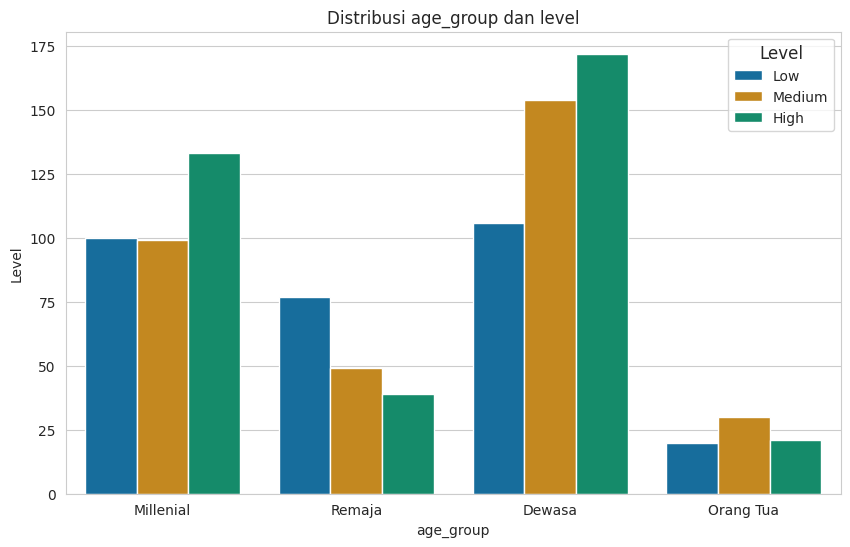

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='Level', data=Data, palette='colorblind')
plt.xlabel('age_group')
plt.ylabel('Level')
plt.title('Distribusi age_group dan level')
plt.legend(title='Level', title_fontsize=12)
plt.show()


*   Berdasarkan visualisasi tersebut dapat dilihat bahwa pasien yang memiliki Level high untuk kanker paru2 didominasi oleh kategori umur dewasa dan diikuti oleh milenial hingga kategori umur orang tua memiliki kasus tersedikit.
*   Untuk kasus pasien yang memiliki kategori level medium juga terdapat pada kategori umur dewasa yang memiliki kasus terbanyak begitu pula untuk kasus dengan level low.

Hal ini menunjukan bahwa pasien yang memiliki kasus kanker paru2 didominasi oleh kategori umur dewasa dilanjutkan oleh milenial, remaja dan orang tua memiliki kasus tersedikit.






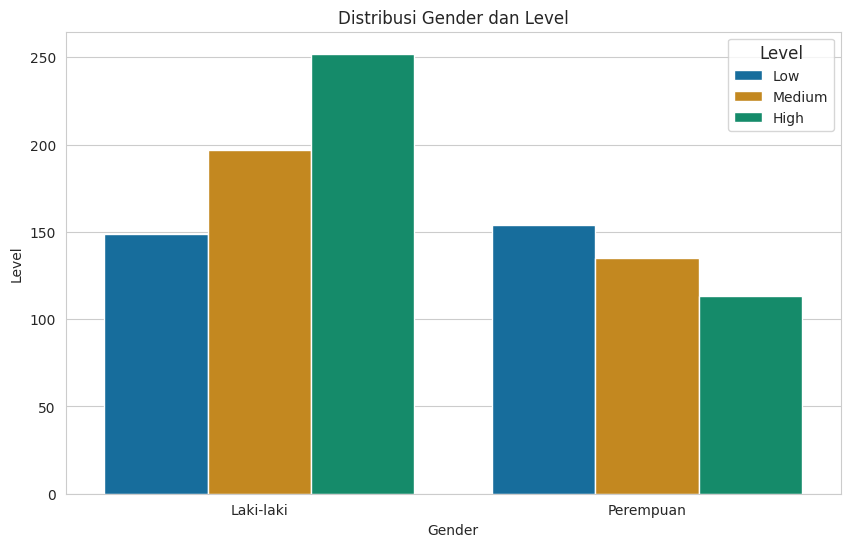

In [17]:
# Mengganti label "1" menjadi "Laki-laki" dan "2" menjadi "Perempuan" di kolom 'Gender'
Data['Gender'] = Data['Gender'].replace({1: 'Laki-laki', 2: 'Perempuan'})

# Membuat bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Level', data=Data, palette='colorblind')
plt.xlabel('Gender')
plt.ylabel('Level')
plt.title('Distribusi Gender dan Level')
plt.legend(title='Level', title_fontsize=12)
plt.show()

Kolom diatas menunjukan pasien dengan gender apa yang memiliki kasus terbanyak. Berdasarkan visualisasi tersebut untuk kasus pasien yang terkena kanker paru2 untuk level high dan medium didominasi oleh gender laki2 sedangkan untuk kasus low level gender perempuan memiliki kasus yang lebih banyak.

In [18]:
Data['Alcohol use'].unique()

array([4, 1, 5, 7, 8, 3, 6, 2])

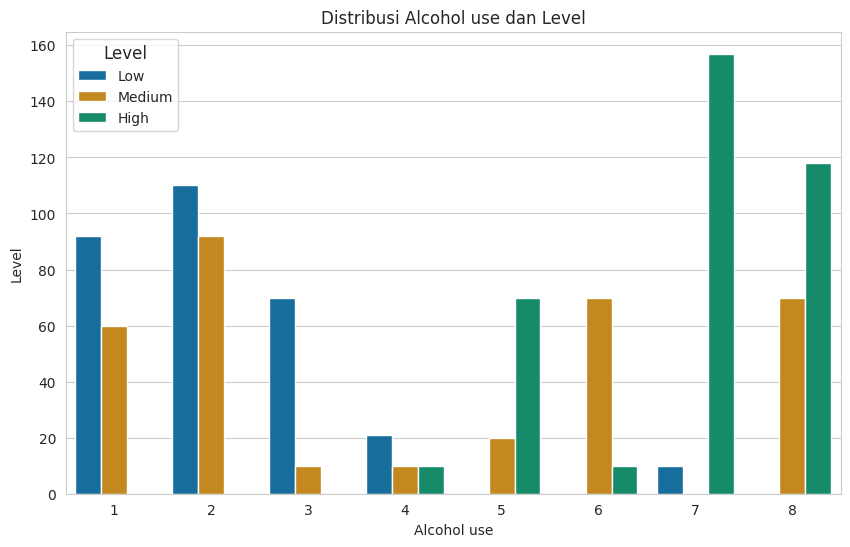

In [19]:
# Membuat bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Alcohol use', hue='Level', data=Data, palette='colorblind')
plt.xlabel('Alcohol use')
plt.ylabel('Level')
plt.title('Distribusi Alcohol use dan Level')
plt.legend(title='Level', title_fontsize=12)
plt.show()

Disini saya mengasumsikan semakin tinggi angka di alcohol use mengartikan semakin sering pula ia mengonsumsi alkohol. Berdasarkan visualisasi tersebut dapat dilihat bahwa pasien yang mengonsumsi alkohol sangat sering maka kasus level high dari kanker paru2 nya juga banyak.

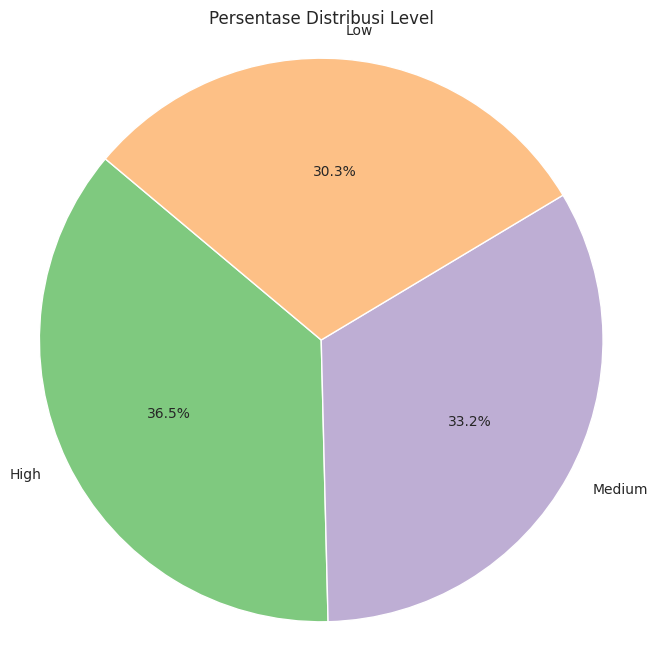

In [20]:
# Menghitung jumlah level untuk setiap kategori
level_count = Data['Level'].value_counts()

# Membuat pie plot
plt.figure(figsize=(8, 8))
plt.pie(level_count, labels=level_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Accent.colors)
plt.axis('equal')  # Membuat lingkaran menjadi lingkaran, bukan elips
plt.title('Persentase Distribusi Level')
plt.show()

Kolom diatas menunjukan presentase dari kasus radang paru2 berdasarkan levelnya. Dapat dilihat  bahwa kasus dengan high level memiliki persentase  36.5%, untuk kasus medium level terdapat persentase sebesar 33.2% dan low level sebesar 30.3%.

In [21]:
Data['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

Kolom diatas digunakan untuk mengecek apakah data yang kita miliki balance atau tidak pada kolom target. Berdasarkan output tersebut dapat dilihat bahwa data target yang kita miliki balance dikarenakan setiap kategori memiliki rentang kasus yang tidak terlalu jauh.

# **Feature Engineering**

In [22]:
Data.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level', 'age_group'],
      dtype='object')

In [23]:
#split data
X = Data.drop(['Patient Id', 'Age', 'Gender','Level', 'age_group'], axis=1)
y = Data['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(700, 21)
(300, 21)
(700,)
(300,)


Pada kolom diatas melakukan split data dengan melakukan drop kolom berdasarkan tresshold dari phik correlation yang telah dibuat diatas lalu kita menjadikan kolom Level sebagai target atau Y.

In [24]:
#VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Function untuk melakukan perhitungan vif

In [25]:
def normal(df,col):
    upper = df[col].mean() + (3 * df[col].std())
    lower = df[col].mean() - (3 * df[col].std())

    outlier = df[(df[col] <= lower) | (df[col] >= upper)]

    print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

def skew(df, col, fold):
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)

    IQR = Q3 - Q1

    upper = Q3 + (fold*IQR)
    lower = Q1 - (fold*IQR)

    outlier = df[(df[col] <= lower) | (df[col] >= upper)]

    print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
    print('upper: ', upper)
    print('lower: ', lower)

#Function to plot distribution
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")

    plt.show()

    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
        normal(df, col)
    elif df[col].skew() > 0.5:
        if df[col].skew() > 1:
            print("Columns '{}' extreme right skewed".format(col))
            skew(df, col, 3)
        else:
            print("Columns '{}' right skewed".format(col))
            skew(df, col, 1.5)
    elif df[col].skew() < -0.5:
        if df[col].skew() < 1:
            print("Columns '{}' extreme left skewed".format(col))
            skew(df, col, 3)
        else:
            print("Columns '{}' left skewed".format(col))
            skew(df, col, 1.5)

Function untuk mengecek distribusi serta persen dari outlier yang terdapat di tiap fitur kita.

In [26]:
calc_vif(num_cols)


,variables,VIF
0,Age,4.755501
1,Snoring,4.927700
2,Dry Cough,5.899183
3,Frequent Cold,6.828858


Berdasarkan output diatas dapat dilihat bahwa vif untuk kolom numerik masih dibawah 10 sehingga kita tidak perlu handling.

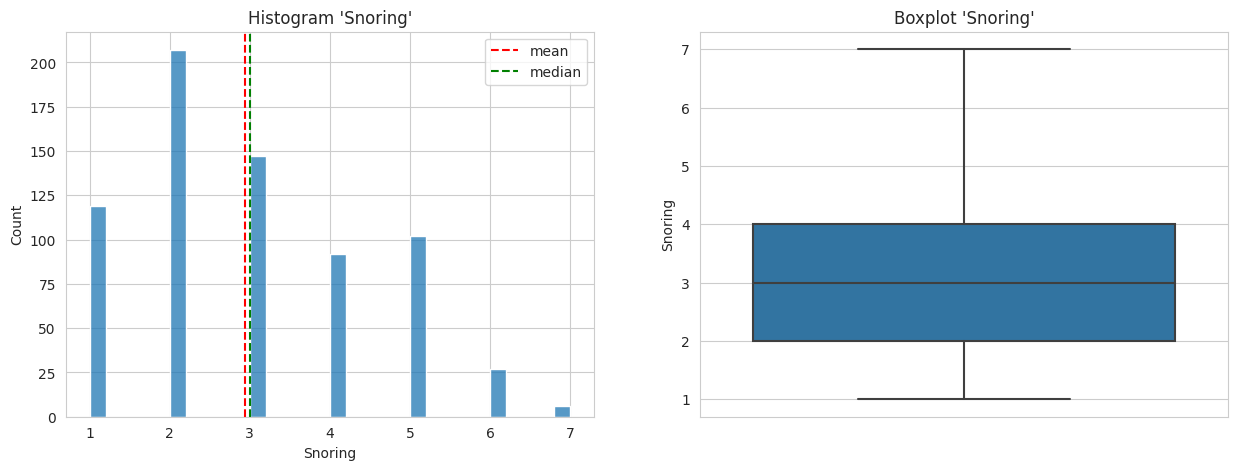

Snoring Kurtosis: -0.6270315022674691
Snoring Skewness: 0.5143216746337723
Columns 'Snoring' right skewed
percentage:  0.8571428571428572 %
upper:  7.0
lower:  -1.0


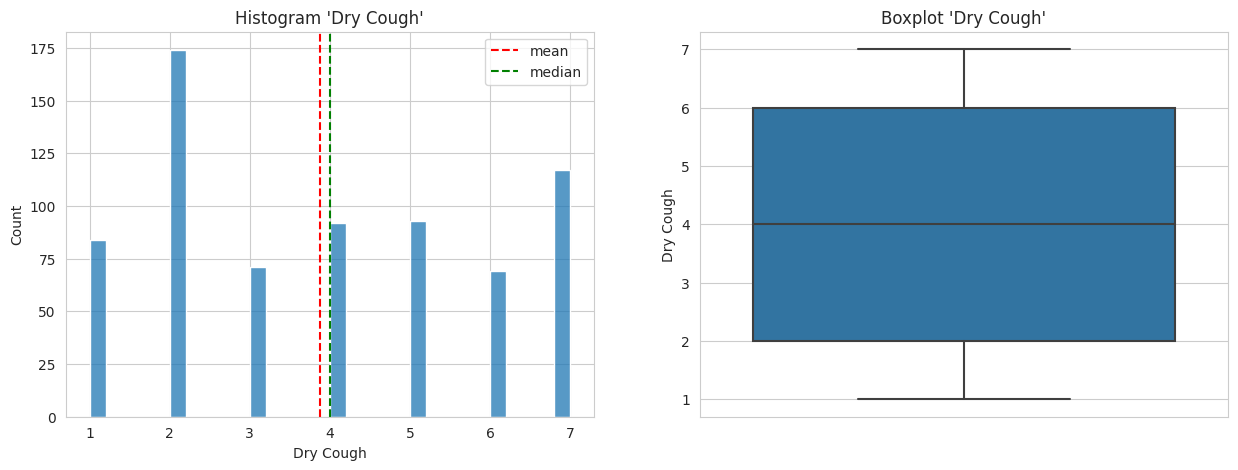

Dry Cough Kurtosis: -1.3208886249476155
Dry Cough Skewness: 0.19913976565589367
Columns 'Dry Cough' normal distribution
percentage:  0.0 %


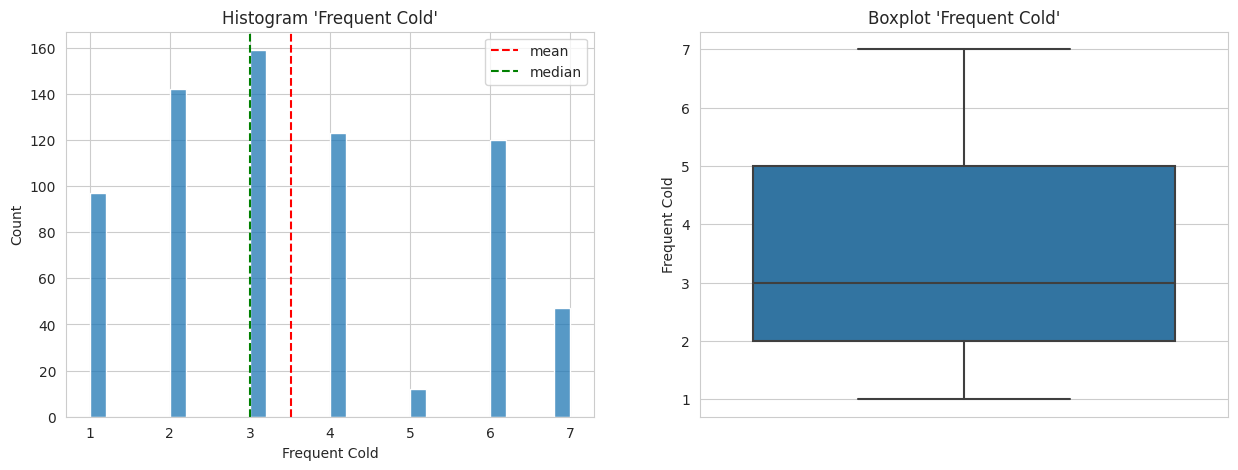

Frequent Cold Kurtosis: -0.9389898542057202
Frequent Cold Skewness: 0.4287061143807289
Columns 'Frequent Cold' normal distribution
percentage:  0.0 %


In [27]:
# List kolom yang ingin Anda plot
kolom_terpilih = ['Snoring', 'Dry Cough','Frequent Cold']

for col in kolom_terpilih:
    plot_dist(X_train, col)


Output diatas menunjukan histogram serta boxplot dari distribusi kolom atau fitur yang kita miliki serta memberikan persenan outlier yang ada, lalu kenapa hanya terdapat 3 fitur yang dicek dikarenakan fitur yang lain bersifat kategorikal. berikut merupakan distribusi serta outlier di tiap kolom:


1.   snooring memiliki distribusi data yang mengarah ke kanan atau right skew serta persentase outlier sebesar 0.85% sehingga nantinya akan kita handling.
2.   Dry cough dan frequent cold memiliki distribusi yang normal dan tidak memiliki outlier.




In [28]:
num_pipeline = Pipeline([
    ('outlier2', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
    ('scaler2', MinMaxScaler())
])
num_tr = num_pipeline.fit_transform(X_train[['Snoring']])

Kolom diatas digunakan untuk handling outlier untuk kolom snoring. Dikarenakan distribusi datanya tidak extreme maka dari itu kita menggunakan methode IQR serta dikarenakan persen dari outlier dibawah 1 maka kita menggunakan fold 1.5

In [29]:
num_pipeline2 = Pipeline([
    ('scaler3', MinMaxScaler())
])
num_tr2 = num_pipeline2.fit_transform(X_train[['Dry Cough','Frequent Cold']])

Kode diatas digunakan untuk melakukan scaling terhadap kolom yang tidak memiliki outlier.

In [30]:
full_pipeline = ColumnTransformer([
        ('num1', num_pipeline, ['Snoring']),
        ('num2', num_pipeline2, ['Dry Cough','Frequent Cold']),
    ])
train_tr = full_pipeline.fit_transform(X_train)

Kolom diatas digunakan untuk menggabungkan seluruh pipeline preprocesssing yang telah kita buat menjadi full_pipeline

In [31]:
test_tr = full_pipeline.transform(X_test)

In [32]:
test_tr.shape

(300, 3)

# **MODEL DEFINITION**

In [33]:
logreg = LogisticRegression(random_state=0)
svc = SVC(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

Disini kita mendifinisikan model yang akan kita pakai, terdapat logistic regression, support vector machine. decision tree dan random forest classifier. Nantinya kita akan memilih model mana yang memiliki performa terbaik untuk memprediksi level kanker paru2 ini.

# **Model Trainning & Model Evaluation**

## Model Logistic Regression

In [34]:
logreg.fit(train_tr, y_train)

lr_train = logreg.predict(train_tr)
lr_test = logreg.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

        High       0.65      0.64      0.65       256
         Low       0.52      0.59      0.55       212
      Medium       0.39      0.34      0.36       232

    accuracy                           0.53       700
   macro avg       0.52      0.53      0.52       700
weighted avg       0.52      0.53      0.52       700

              precision    recall  f1-score   support

        High       0.64      0.57      0.60       109
         Low       0.51      0.59      0.55        91
      Medium       0.33      0.32      0.32       100

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.50      0.49      0.49       300



  Kolom diatas melakukan prediksi dengan menggunakan model logistic regression dan menggunakan classification report untuk melihat performanya. Pada case ini saya menggunakan matrics evaluasi accuracy dikarenakan data kita balance sehingga kita dapat menggunakan akurasi saja. Pada classification report diatas dapat dilihat bahwa model logistic regression memiliki performa akurasi model sebesar 0.53 untuk data train dan 0.49 untuk data test. Hal ini menunjukan model logistic regression memiliki performa yang kurang baik.

In [35]:
# cross-val
logreg_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', LogisticRegression(random_state=0))
    ])

scores_logreg = cross_val_score(logreg_pipe, X_train, y_train,
                        scoring='accuracy', cv=10)
print(scores_logreg)
print(scores_logreg.mean())

[0.5        0.48571429 0.52857143 0.55714286 0.58571429 0.68571429
 0.42857143 0.48571429 0.47142857 0.57142857]
0.53


Kolom diatas merupakan cross validation yang berfungsi untuk  mengevaluasi performa model dengan melakukan iterasi sebanyak 10 kali. Berdasarkan output diatas dapat dilihat scroe rata-rata dari model hanya sebesar 0.53

Confusion Matrix Train: 
Confusion Matrix Test: 


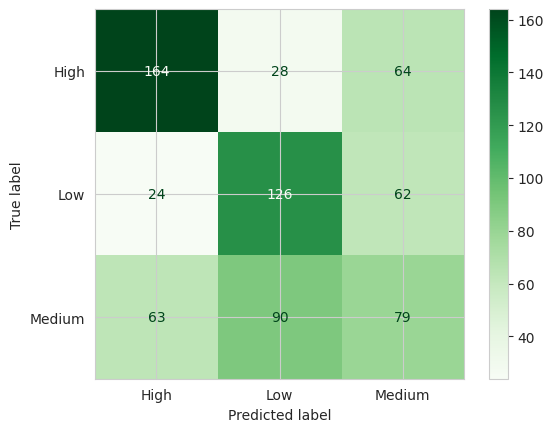

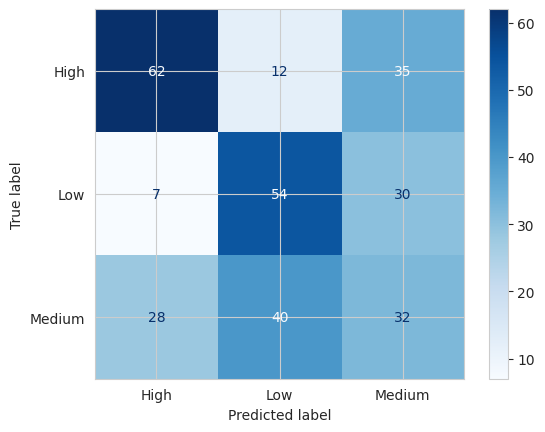

In [36]:
print('Confusion Matrix Train: \n', ConfusionMatrixDisplay.from_estimator(logreg, train_tr, y_train, cmap='Greens'))
print('Confusion Matrix Test: \n', ConfusionMatrixDisplay.from_estimator(logreg, test_tr, y_test, cmap='Blues'))

Pada kolom diatas merupakan confussion matriks untuk melihat total hasil data prediksi yang dilakukan oleh model. Pada kasus true positive
 yang saya mengambil adalah kategori high. Sehingga dapat dilihat pada data train terdapat 164 total pasien dan pada data test terdapat 62 total pasien.

## Model SVM

In [37]:
svc.fit(train_tr, y_train)

svc_train = svc.predict(train_tr)
svc_test = svc.predict(test_tr)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

        High       0.98      0.89      0.93       256
         Low       0.75      0.91      0.82       212
      Medium       0.93      0.84      0.88       232

    accuracy                           0.88       700
   macro avg       0.89      0.88      0.88       700
weighted avg       0.89      0.88      0.88       700

              precision    recall  f1-score   support

        High       0.94      0.89      0.92       109
         Low       0.77      0.88      0.82        91
      Medium       0.95      0.88      0.91       100

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.89       300



Kolom diatas merupakan penggunaan model svm untuk melakukan prediksi dan dapat dilihat di classification reportnya model ini memiliki score akurasi yang lebih baik dibandingkan model logistic regression. Score akurasi yang dimiliki model ini adalah 0.88 untuk data train dan data test.

In [38]:
# cross-val
svc_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', SVC(random_state=0))
    ])

scores_svc = cross_val_score(svc_pipe, X_train, y_train,
                        scoring='accuracy', cv=10)
print(scores_svc)
print(scores_svc.mean())

[0.77142857 0.82857143 0.85714286 0.9        0.85714286 0.88571429
 0.7        0.85714286 0.85714286 0.84285714]
0.8357142857142856


Kolom diatas merupakan hasil cross validation untuk model SVM dengan iterasi sebanyak 10 kali dan menunjukan score akurasi rata2 dari model sebesar 0.83

Confusion Matrix Train: 
Confusion Matrix Test: 


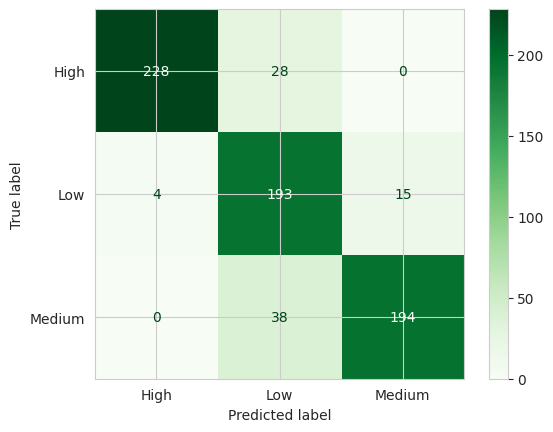

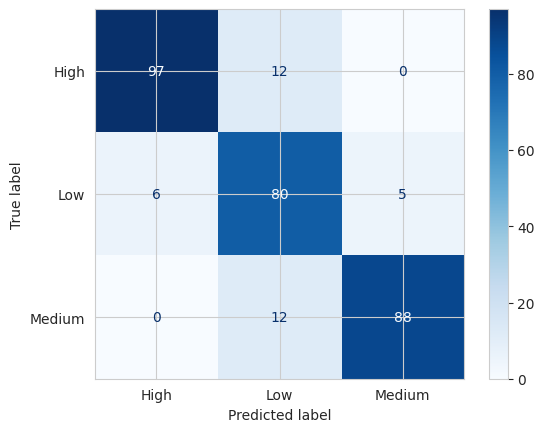

In [39]:
print('Confusion Matrix Train: \n', ConfusionMatrixDisplay.from_estimator(svc, train_tr, y_train, cmap='Greens'))
print('Confusion Matrix Test: \n', ConfusionMatrixDisplay.from_estimator(svc, test_tr, y_test, cmap='Blues'))

Pada confusion matriks diatas dapat dilihat terdapat total true positive sebanyak 228 pasien pada data train dan 97 pasien pada data test.

## Model Decision Tree

In [40]:
dtc.fit(train_tr, y_train)

dtc_train = dtc.predict(train_tr)
dtc_test = dtc.predict(test_tr)

print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))

              precision    recall  f1-score   support

        High       0.97      0.97      0.97       256
         Low       1.00      0.86      0.93       212
      Medium       0.90      1.00      0.95       232

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700

              precision    recall  f1-score   support

        High       0.99      0.97      0.98       109
         Low       1.00      0.88      0.94        91
      Medium       0.88      1.00      0.94       100

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



Kolom diatas merupakan pemodelan dengan menggunakan model decision tree. Pada classification report diatas dapat dilihat bahwa score akurasi dari model memiliki score sebesar 0.95 untuk kedua data train maupun data test, hal ini menunjukan model decision tree memiliki performa yang lebih baik dibandingkan model logistic regression dan svm.

In [41]:
# cross-val
dtc_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', DecisionTreeClassifier(random_state=0))
    ])

scores_dtc = cross_val_score(dtc_pipe, X_train, y_train,
                        scoring='accuracy', cv=10)
print(scores_dtc)
print(scores_dtc.mean())

[0.9        0.92857143 0.95714286 0.94285714 0.95714286 0.94285714
 0.95714286 0.94285714 0.92857143 0.97142857]
0.9428571428571428


Kolom diatas merupakan cross validation yang dilakukan terhadap model decision tree dan didapatkan rata2 score akurasi yang didapatkan model ini adalah sebesar 0.94

Confusion Matrix Train: 
Confusion Matrix Test: 


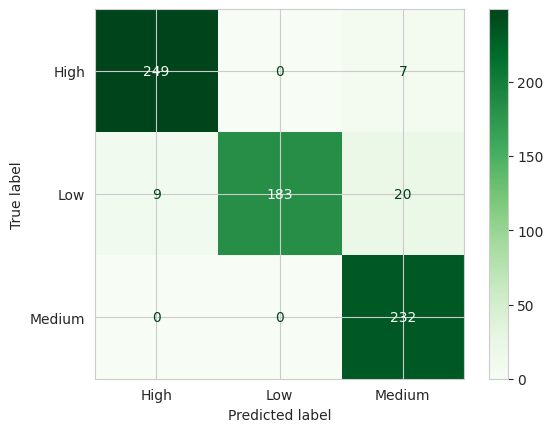

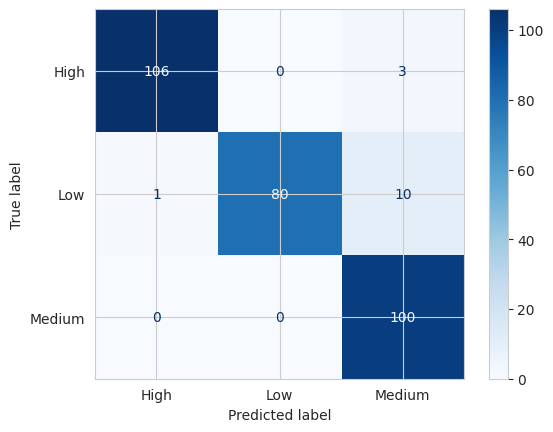

In [42]:
print('Confusion Matrix Train: \n', ConfusionMatrixDisplay.from_estimator(dtc, train_tr, y_train, cmap='Greens'))
print('Confusion Matrix Test: \n', ConfusionMatrixDisplay.from_estimator(dtc, test_tr, y_test, cmap='Blues'))

Pada confusion matriks diatas dapat dilihat true positive yang didapatkan di model ini sebesar 249 pasien pada data train dan 106 pasien pada data test.

## Model Random Forest

In [43]:
rfc.fit(train_tr, y_train)

rfc_train = rfc.predict(train_tr)
rfc_test = rfc.predict(test_tr)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))

              precision    recall  f1-score   support

        High       0.97      0.97      0.97       256
         Low       1.00      0.86      0.93       212
      Medium       0.90      1.00      0.95       232

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700

              precision    recall  f1-score   support

        High       0.99      0.97      0.98       109
         Low       1.00      0.88      0.94        91
      Medium       0.88      1.00      0.94       100

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



Pada model ini dilakukan prediksi dengan menggunakan model random forest dan didapatkan classification report dengan score akurasi sebesar 0.95. Hal ini menunjukan bahwa random forest memiliki performa yang sama baik nya seperti decision tree dan memiliki performa yang lebih baik dibandingkan logistic regression dan svm.

In [44]:
# cross-val
rfc_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', RandomForestClassifier(random_state=0))
    ])

scores_rfc = cross_val_score(rfc_pipe, X_train, y_train,
                        scoring='accuracy', cv=10)
print(scores_rfc)
print(scores_rfc.mean())

[0.9        0.92857143 0.95714286 0.94285714 0.95714286 0.94285714
 0.97142857 0.94285714 0.92857143 0.98571429]
0.9457142857142857


Kolom diatas merupakan cross validation yang dilakukan untuk model random forest dengan iterasi sebanyak 10 kali. Dapat dilihat bahwa skor akurasi rata2 yang didapatkan model ini sebesar 0.94

Confusion Matrix Train: 
Confusion Matrix Test: 


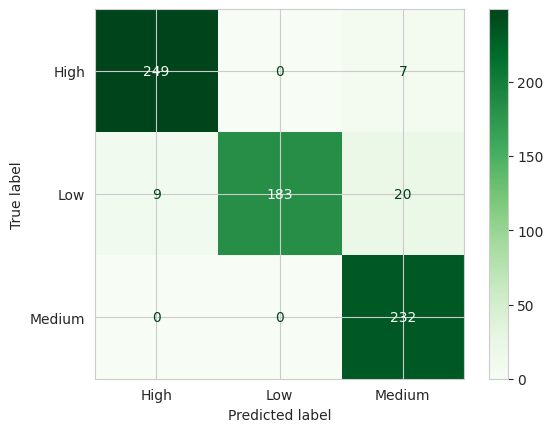

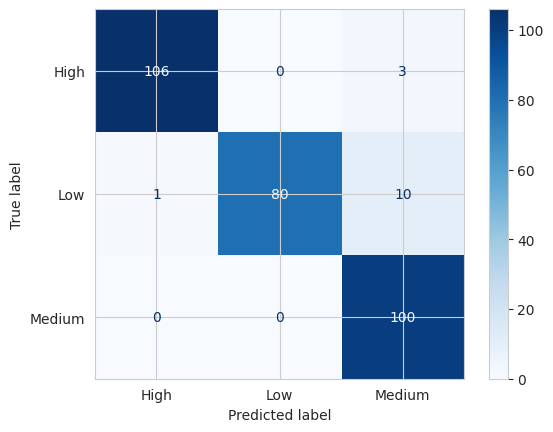

In [45]:
print('Confusion Matrix Train: \n', ConfusionMatrixDisplay.from_estimator(rfc, train_tr, y_train, cmap='Greens'))
print('Confusion Matrix Test: \n', ConfusionMatrixDisplay.from_estimator(rfc, test_tr, y_test, cmap='Blues'))

Pada konfusion matriks ini dapat dilihat true positive yang didapatkan model ini sebesar 249 untuk data train dan 106 pasien pada data test.

# **Hyperparameter Tuning**

## hyperaparameter model logistic regression

Pada section ini kita melakukan hyperparameter tuning terhadap dua model yang memiliki performa terbaik yaitu random forest dan decision tree. Hyperparameter tuning ini digunakan untuk mencari parameter terbaik untuk meningkatkan performa dari model.

In [46]:
params = [
    {'n_estimators': [10, 20, 40, 60],        # 4
     'max_features': [2, 3, 5, 1],            # 4
     'max_depth': [5, 10, None],              # 3
     'criterion': ['gini', 'entropy']},       # 2   Total 4*4*3*2 = 96 combinations
  ]

rfc = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(rfc, params, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(train_tr, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, None],
                          'max_features': [2, 3, 5, 1],
                          'n_estimators': [10, 20, 40, 60]}],
             return_train_score=True, scoring='accuracy')

Melakukan hyperparameter tuning untuk model random forest.

In [47]:
grid_search.best_params_


{'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'n_estimators': 40}

Berdasarkan output diatas dapat dilihat best parameter yang didapatkan adalah 'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'n_estimators': 40. Best parameter ini akan di apply ke dalam model dan dilihat scorenya.

In [48]:
grid_search.best_score_


0.9457142857142857

In [49]:
model_RFC_tuning = grid_search.best_estimator_

model_RFC_tuning.fit(train_tr, y_train)

model_train = model_RFC_tuning.predict(train_tr)
model_test = model_RFC_tuning.predict(test_tr)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

        High       0.97      0.97      0.97       256
         Low       1.00      0.86      0.93       212
      Medium       0.90      1.00      0.95       232

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700

              precision    recall  f1-score   support

        High       0.99      0.97      0.98       109
         Low       1.00      0.88      0.94        91
      Medium       0.88      1.00      0.94       100

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



Setelah digunakan best parameter tersebut ternyata score yang didapatkan adalah 0.95 atau tidak adanya perubahan score dengan sebelum dilakukan hyperparameter tuning.

## hyperparameter tuning model Decision Tree

In [50]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Lakukan GridSearchCV dengan menggunakan parameter grid yang telah ditentukan
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_tr, y_train)

# Cetak hyperparameter terbaik dan skor akurasi terbaik
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy: 0.9442857142857143


Kolom diatas digunakan untuk melakukan hyperparameter tuning untuk model decision tree dan didapatkan best parameternya adalah 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'

In [51]:
# Evaluasi model dengan hyperparameter terbaik pada data train dan data test
dtc_train_tuned = grid_search.predict(train_tr)
dtc_test_tuned = grid_search.predict(test_tr)

print("Classification Report (Train Data):")
print(classification_report(y_train, dtc_train_tuned))

print("Classification Report (Test Data):")
print(classification_report(y_test, dtc_test_tuned))

Classification Report (Train Data):
              precision    recall  f1-score   support

        High       0.97      0.97      0.97       256
         Low       1.00      0.86      0.93       212
      Medium       0.90      1.00      0.95       232

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700

Classification Report (Test Data):
              precision    recall  f1-score   support

        High       0.99      0.97      0.98       109
         Low       1.00      0.88      0.94        91
      Medium       0.88      1.00      0.94       100

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



Sama seperti model random forest, hyperparameter yang dilakukan di model decision tree untuk akurasinya sama saja seperti sebelum dilakukan hyperparameter tuning

# **Save Model**

Pada bagian ini dilakukan saving model untuk kepentingan deploy dan model inference

In [52]:
AllProcess = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", model_RFC_tuning)
])
AllProcess

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('outlier2',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler2',
                                                                   MinMaxScaler())]),
                                                  ['Snoring']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler3',
                                                                   MinMaxScaler())]),
                                                  ['Dry Cough',
                                                   'Frequent Cold'])])),
                ('classification',
                 RandomForestClassifier(max_depth=10, max_features=2,
                                        n_estimators=40, random_state=0))])

In [53]:
joblib.dump(AllProcess, open('ModelMilestone2.pkl', 'wb'))

In [54]:
X_train.to_csv('X_train.csv', index=False)

# **PENARIKAN KESIMPULAN**



*   Berdasarkan korelasi yang telah dibuat didapatkan bahwa faktor-faktor penyebab dari kanker paru-paru itu sangat banyak seperti sebagai berikut 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards','Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity','Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood','Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing','Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold','Dry Cough', 'Snoring'
*   Berdasarkan hasil performa model yang dievaluasi dengan metriks akurasi didapatkan model random forest serta model decision tree memiliki akurasi model yang terbaik dibandingkan yang lainnya dengan score akurasi sebesar 0.95
*   Model yang telah dibuat ini dapat digunakan untuk  membantu rumah sakit untuk pendeteksian dini dari Orang yang dianggap positif terkena kanker paru-paru sehingga agar bisa lebih cepat untuk ditangani.



